<a href="https://colab.research.google.com/github/md-omar-f/demo-repo/blob/main/SkinCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdomarf","key":"2d9f125a585b34c63a2638ff298ebe55"}'}

In [3]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download fanconic/skin-cancer-malignant-vs-benign

 96% 313M/325M [00:03<00:00, 128MB/s]
100% 325M/325M [00:03<00:00, 97.6MB/s]


In [ ]:
! unzip skin-cancer-malignant-vs-benign.zip

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

#val_ds = tf.keras.utils.image_dataset_from_directory(
#    "train/data",
#    image_size = (img_height, img_width),
#    batch_size = batch_size
#)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2637 files belonging to 2 classes.
Found 660 files belonging to 2 classes.


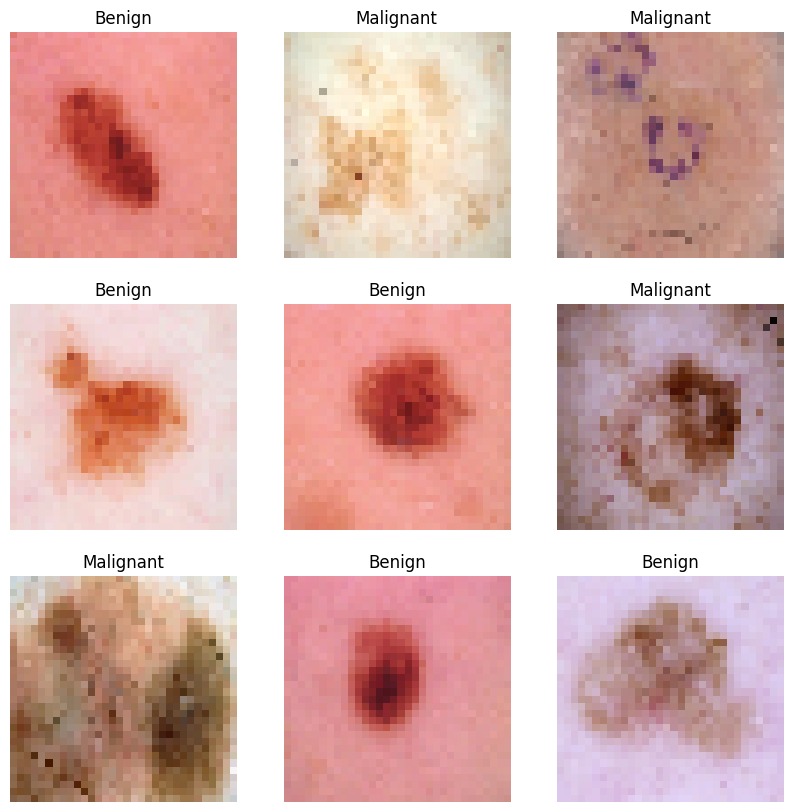

In [13]:
class_names = ["Benign", "Malignant"]
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [14]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3)
    ]
)

In [15]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [16]:
model.fit(
    train_ds,
    #validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
132/132 [==============================] - 7s 43ms/step - loss: 0.6263 - accuracy: 0.6447
Epoch 2/10
132/132 [==============================] - 7s 53ms/step - loss: 0.4669 - accuracy: 0.7801
Epoch 3/10
132/132 [==============================] - 7s 54ms/step - loss: 0.4143 - accuracy: 0.7979
Epoch 4/10
132/132 [==============================] - 6s 42ms/step - loss: 0.4040 - accuracy: 0.8055
Epoch 5/10
132/132 [==============================] - 6s 42ms/step - loss: 0.4052 - accuracy: 0.8017
Epoch 6/10
132/132 [==============================] - 7s 54ms/step - loss: 0.4141 - accuracy: 0.7960
Epoch 7/10
132/132 [==============================] - 6s 43ms/step - loss: 0.3744 - accuracy: 0.8203
Epoch 8/10
132/132 [==============================] - 6s 42ms/step - loss: 0.3712 - accuracy: 0.8180
Epoch 9/10
132/132 [==============================] - 7s 54ms/step - loss: 0.3689 - accuracy: 0.8282
Epoch 10/10
132/132 [==============================] - 6s 45ms/step - loss: 0.3531 - accura

In [17]:
model.evaluate(test_ds)

33/33 [==============================] - 1s 26ms/step - loss: 0.3620 - accuracy: 0.8273


[0.3619757890701294, 0.8272727131843567]

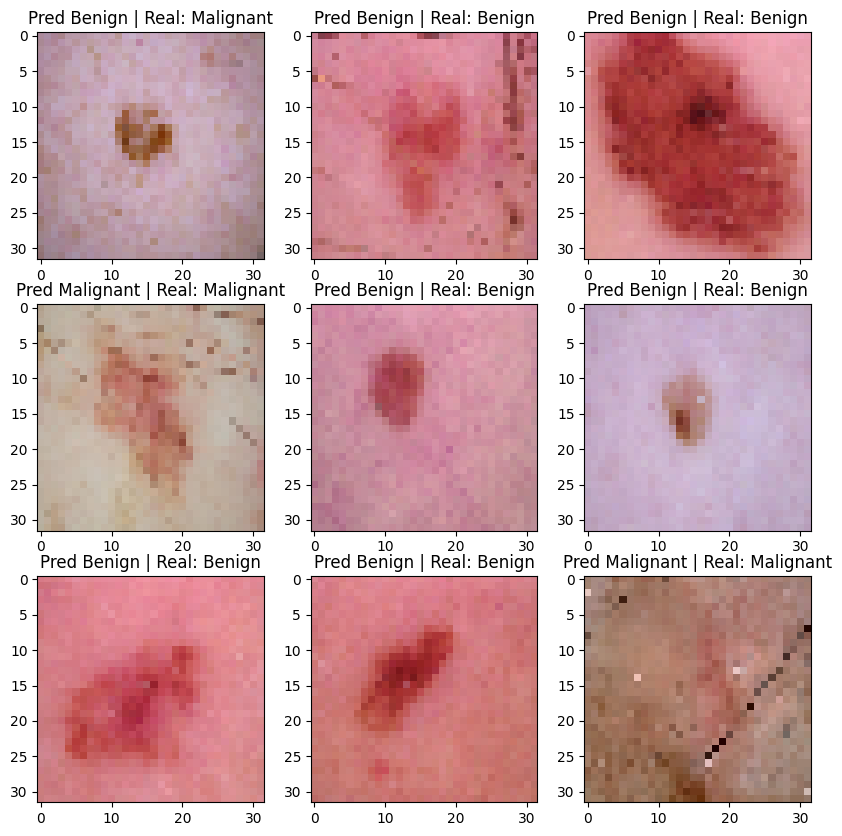

In [20]:
import numpy
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  classifications = model(images);
  #print(classifications)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1);
    plt.imshow(images[i].numpy().astype("uint8"));
    index = numpy.argmax(classifications[i])
    plt.title("Pred " + class_names[index] + " | Real: " + class_names[labels[i]])

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)